### Linear Models for Classification

#### Logistic Regression

   fruit_label fruit_name fruit_subtype  mass  width  height  color_score
0            1      apple  granny_smith   192    8.4     7.3         0.55
1            1      apple  granny_smith   180    8.0     6.8         0.59
2            1      apple  granny_smith   176    7.4     7.2         0.60
3            2   mandarin      mandarin    86    6.2     4.7         0.80
4            2   mandarin      mandarin    84    6.0     4.6         0.79


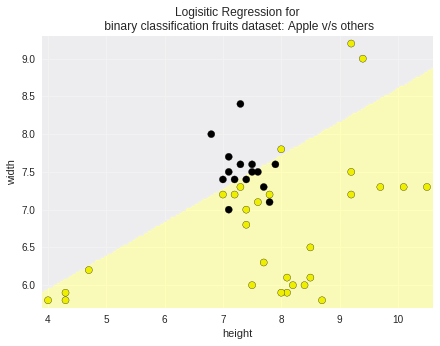

Fruit with height = 6 and width = 8 is predicted to be: an apple
Fruit with height = 10 and width = 7 is predicted to be: not an apple


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot
fruits_data = pd.read_table("../DataFiles/fruit_data_with_colors.txt")
print fruits_data.head()
X,y = fruits_data[['height', 'width']].as_matrix(),(fruits_data['fruit_label']==1).as_matrix()
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)
log_reg = LogisticRegression(C=100)
log_reg.fit(X_train,y_train)
fig, subaxes = plt.subplots(1, 1, figsize=(7, 5))
plot_class_regions_for_classifier_subplot(log_reg,X_train,y_train,None,None,"Logisitic Regression \
for\n binary classification fruits dataset: Apple v/s others",subaxes)
subaxes.set_xlabel("height")
subaxes.set_ylabel("width")
plt.show()
h = 6
w = 8
print "Fruit with height = {} and width = {} is predicted to be: {}"\
.format(h,w,['not an apple', 'an apple'][log_reg.predict([[h,w]])[0]])
h = 10
w = 7
print "Fruit with height = {} and width = {} is predicted to be: {}"\
.format(h,w,['not an apple', 'an apple'][log_reg.predict([[h,w]])[0]])

#### Logistic regression Regularization: C parameter

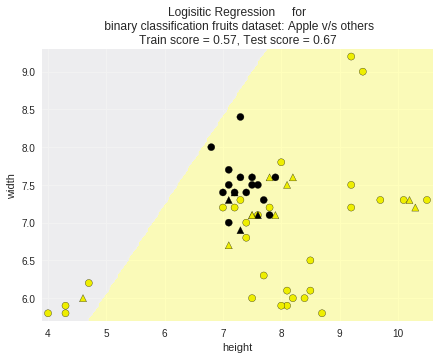

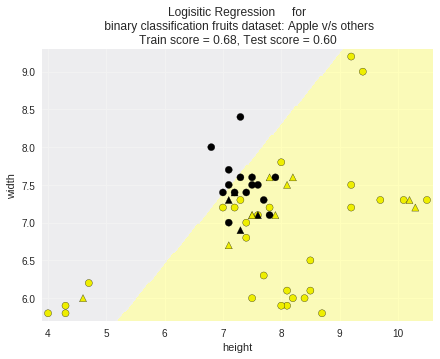

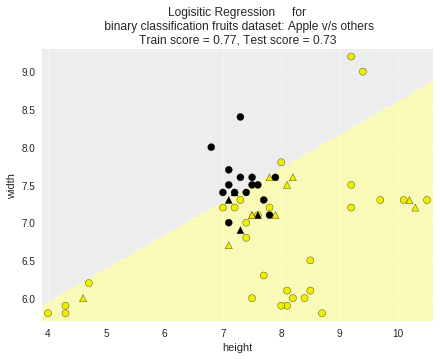

In [2]:
X,y = fruits_data[['height', 'width']].as_matrix(),(fruits_data['fruit_label']==1).as_matrix()
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)
for this_c in [0.1,1,100]:
    log_reg = LogisticRegression(C=this_c)
    log_reg.fit(X_train,y_train)
    fig, subaxes = plt.subplots(1, 1, figsize=(7, 5))
    plot_class_regions_for_classifier_subplot(log_reg,X_train,y_train,X_test,y_test,"Logisitic Regression \
    for\n binary classification fruits dataset: Apple v/s others",subaxes)
    subaxes.set_xlabel("height")
    subaxes.set_ylabel("width")
    plt.show()

#### Logistic regression on synthetic dataset

Synthetic Dataset for classification


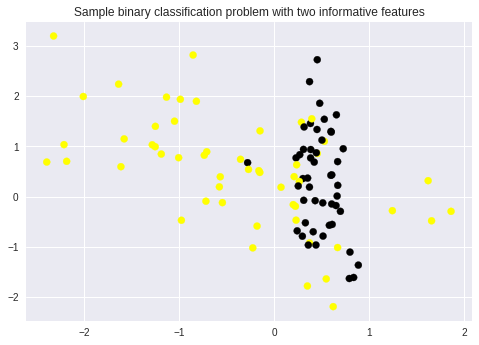

Synthetic Dataset for classification with Decision boundaries after applying logistic regressiom


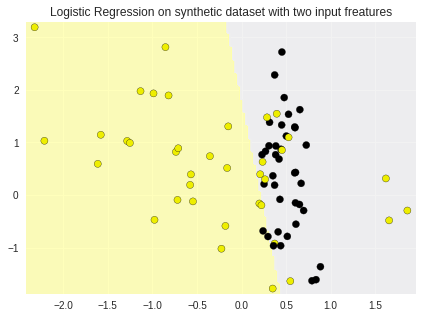

Accuracy of Logistic regression classifier on training set: 0.81
Accuracy of Logistic regression classifier on test set: 0.84


In [3]:
# synthetic dataset for classification (binary)
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot
from matplotlib.colors import ListedColormap
cmap_bold = ListedColormap(['#FFFF00', '#00FF00', '#0000FF','#000000'])
X_C2, y_C2 = make_classification(n_samples = 100, n_features=2,
                                n_redundant=0, n_informative=2,
                                n_clusters_per_class=1, flip_y = 0.1,
                                class_sep = 0.5, random_state=0)
print "Synthetic Dataset for classification"
plt.figure()
plt.title('Sample binary classification problem with two informative features')
plt.scatter(X_C2[:, 0], X_C2[:, 1], c=y_C2,
           marker= 'o', s=50, cmap=cmap_bold)
plt.show()
print "Synthetic Dataset for classification with Decision boundaries after applying logistic regressiom"
X_train,X_test,y_train,y_test = train_test_split(X_C2, y_C2,random_state=0)
fig,subaxes = plt.subplots(1,1,figsize=(7,5))
log_reg = LogisticRegression(C=100)
log_reg.fit(X_train,y_train)
title = "Logistic Regression on synthetic dataset with two input freatures"
plot_class_regions_for_classifier_subplot(log_reg,X_train,y_train,None,None,title,subaxes)
plt.show()
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(log_reg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(log_reg.score(X_test, y_test)))

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
cancer_dataset = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)
print cancer_dataset['data']
print cancer_dataset['target_names']
print cancer_dataset['feature_names']
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)
log_reg = LogisticRegression().fit(X_train, y_train)
print('Breast cancer dataset')
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(log_reg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(log_reg.score(X_test, y_test)))

[[  1.79900000e+01   1.03800000e+01   1.22800000e+02 ...,   2.65400000e-01
    4.60100000e-01   1.18900000e-01]
 [  2.05700000e+01   1.77700000e+01   1.32900000e+02 ...,   1.86000000e-01
    2.75000000e-01   8.90200000e-02]
 [  1.96900000e+01   2.12500000e+01   1.30000000e+02 ...,   2.43000000e-01
    3.61300000e-01   8.75800000e-02]
 ..., 
 [  1.66000000e+01   2.80800000e+01   1.08300000e+02 ...,   1.41800000e-01
    2.21800000e-01   7.82000000e-02]
 [  2.06000000e+01   2.93300000e+01   1.40100000e+02 ...,   2.65000000e-01
    4.08700000e-01   1.24000000e-01]
 [  7.76000000e+00   2.45400000e+01   4.79200000e+01 ...,   0.00000000e+00
    2.87100000e-01   7.03900000e-02]]
['malignant' 'benign']
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error

### Linear SVM

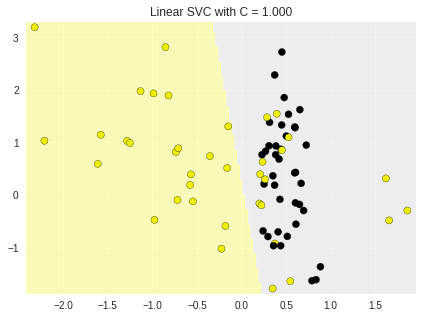

In [17]:
from sklearn.svm import SVC
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot
X_train,X_test,y_train,y_test = train_test_split(X_C2,y_C2,random_state=0)
fig,subaxes = plt.subplots(1,1,figsize=(7,5))
this_C = 1.0
svm = SVC(kernel='linear',C=this_C)
svm.fit(X_train,y_train)
title = 'Linear SVC with C = {:.3f}'.format(this_C)
plot_class_regions_for_classifier_subplot(svm,X_train,y_train,None,None,title,subaxes)
plt.show()

#### Linear SVC model with regularization parameter C

Axes(0.125,0.125;0.227941x0.755)
Axes(0.398529,0.125;0.227941x0.755)
Axes(0.672059,0.125;0.227941x0.755)


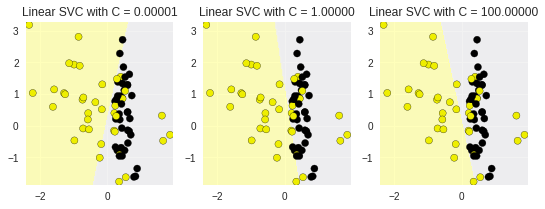

In [32]:
from sklearn.svm import LinearSVC
fig,subaxes = plt.subplots(1,3,figsize=(9,3))
for this_axes,this_C in zip(subaxes,[0.00001,1,100]):
    print this_axes
    svm = LinearSVC(C=this_C)
    svm.fit(X_train,y_train)
    title = 'Linear SVC with C = {:.5f}'.format(this_C)
    plot_class_regions_for_classifier_subplot(svm,X_train,y_train,None,None,title,this_axes)
plt.show()

##### Note: When C is large the decision boundary is adjusted so that more of the black training points are correctly classified While, for small value of C, the classifier is more tolerant of these errors in favor of capturing the majority of data points correctly with a larger margin.

##### Applying Linear SVC to real Dataset

In [45]:
from sklearn.svm import LinearSVC
X_train,X_test,y_train,y_test = train_test_split(X_cancer,y_cancer,random_state=0)
svm = LinearSVC()
svm.fit(X_train,y_train)
print "Breast Cancer Dataset"
print "Accuracy of linear SVC classifier on training dataset = {:.4f}".format(svm.score(X_train,y_train))
print "Accuracy of linear SVC classifier on test dataset = {:.4f}".format(svm.score(X_test,y_test))

Breast Cancer Dataset
Accuracy of linear SVC classifier on training dataset = 0.9061
Accuracy of linear SVC classifier on test dataset = 0.9441
